In [ ]:
# Neural Network Solution (CNN: CIFAR-10)

# Donald Bango
# Grand Canyon University
# DSC 550 - Deep Learning
# Dr. Wahid
# 3 July 2024

## Dataset Description

The CIFAR-10 dataset, developed by researchers at the University of Toronto, serves as a key benchmark for image classification and object recognition in machine learning. Created in 2009, it was designed to evaluate image processing deep generative models like convolutional Neural Networks. The dataset is a subset of the original Tiny Images Dataset from MIT and NYU.

### Key Characteristics:

- Instances: 60,000 32x32 color images.
- Classes: 10 object categories, each with 6,000 images:
- Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck.
- Data Splits: Standard training set of 50,000 images and a test set of 10,000 images.
- Preprocessing: Detailed in the technical report by Krizhevsky (2009).


## Deep Learning Problem Statement
The primary objective of this project is to develop a Convolutional Neural Network (CNN) model capable of accurately classifying images from the CIFAR-10 dataset into one of the ten predefined classes. Addressing this problem is crucial for improving the accuracy and efficiency of image recognition systems, which are widely used in a wide range of real-world applications.

### Examples of Applications:

- Autonomous Vehicles: Enhancing image recognition to improve navigation, obstacle detection, and decision-making, overall increasing safety of travel.
- Facial Recognition Systems: Providing high accuracy to prevent false identifications and ensure security in different cyber security settings.
- Medical Imaging: CNNS can Assist in the accurate classification of medical images, improving disease detection and patient treatment planning using X-Rays, MRI's, and Ultrasounds.

### Potential Real World Problem:

Recently, in Phoenix, Arizona, an autonomous vehicle was spotted driving the wrong way in traffic due to misidentifying a street sign (Bachara, 2024). This incident highlights the need for improved image classification accuracy in self-driving car systems. By applying CNNs to train a model that achieves high accuracy in image classification, we aim to enhance the reliability and safety of autonomous driving technologies. This improvement can lead to increased safety and broader adoption of self-driving cars through more accurate neural network-based image recognition.


### Approach

Exploratory Data Analysis (EDA): Perform descriptive analysis and create informative plots to better understand the dataset.

Data Preprocessing: Normalize and augment the data to improve model generalization. Convert labels to one-hot encoding format.

Model Building: Construct a CNN model with multiple convolutional layers, batch normalization, max pooling, and dropout layers.

Training and Evaluation: Train the model using the training dataset and validate it using the validation dataset. Evaluate the final model on the test dataset.

Hyperparameter Tuning: Optimize the model by tuning hyperparameters such as learning rate and batch size.

Deployment: Deploy the trained model on Google Cloud Platform (GCP) to leverage its computational power.

### Tools Used

Python: Programming language used for implementation.

TensorFlow/Keras: Frameworks used for building and training the deep learning model.

Google Cloud Platform (GCP): Cloud service used for training and deploying the model.

Matplotlib: Library for creating visualizations.

NumPy: Library for numerical computations.

OpenCV: Library for image processing.

Scikit-Learn: Library for model selection and data splitting.

Warnings: For managing warnings during code execution.

### Theoretical Foundations 

A Convolutional Neural Network (CNN) is a class of deep neural networks, commonly utilized for finding patterns in images to recognize objects, classes, and categories. The layers in a CNN typically consist of:

1. **Convolutional Layers**: Apply convolution operations to the input, capturing local patterns.
2. **Batch Normalization Layers**: Normalize the output of the convolutional layers, speeding up training.
3. **Pooling Layers**: Downsample the spatial dimensions, reducing the number of parameters.
4. **Dropout Layers**: Regularize the model by randomly setting a fraction of input units to zero.
5. **Fully Connected Layers**: Combine the features learned by the convolutional layers and output the final predictions.

### Theoretical Foundations

Let \( X \) be the input image tensor with dimensions \((N, H, W, C)\), where \( N \) is the number of images, \( H \) and \( W \) are the height and width of the images, and \( C \) is the number of channels.

1. **Convolution Operation**:
   $$
   (X * W + b)
   $$
   Where \( * \) denotes the convolution operation, \( W \) are the filter weights, and \( b \) is the bias term.

2. **ReLU Activation**:
   $$
   \text{ReLU}(x) = \max(0, x)
   $$

3. **Batch Normalization**:
   $$
   \hat{x} = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}}
   $$
   $$
   y = \gamma \hat{x} + \beta
   $$
   Where \( mu \) and \( sigma \) are the mean and variance, and \( gamma \) and \( beta \) are learnable parameters.

4. **Max Pooling**:
   $$
   y_{i,j,k} = \max_{m,n} x_{i+m,j+n,k}
   $$

5. **Dropout**:
   $$
   y = x \cdot \text{mask}
   $$
   Where \(mask) is a binary mask with a probability \( p \) of being zero.

Provide a diagram detailing the architecture and analytics workflow.
### Diagram of the Architecture and Analytics Workflow

![CNN Architecture](https://raw.githubusercontent.com/yourusername/yourrepo/master/cnn_architecture.png)

*Note: Add a diagram of your CNN architecture detailing the layers and their connections.*

### Analytics Workflow

1. **Data Loading**: Load the CIFAR-10 dataset.
2. **Exploratory Data Analysis**: Conduct EDA as preliminary analysis.
2. **Normalization**: Scale pixel values to the range [0, 1].
3. **One-Hot Encoding**: Convert class labels to one-hot encoded vectors.
4. **Data Augmentation**: Apply transformations to increase the diversity of the training data.
5. **Model Training**: Train the CNN model using the augmented data.
6. **Evaluation**: Evaluate the model on the test set.

## Libraries

In [19]:
# Necessary Libraries
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import warnings
warnings.filterwarnings('ignore')
#!pip install opencv-python
#!pip install --upgrade pip
import cv2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 860.5 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.3 MB/s eta 0:00:00a 0:00:010m
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [20]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [21]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)


## Exploratory Data Analysis

In [22]:
# Print shapes of the datasets
print('Train Images Shape:', X_train.shape)
print('Validation Images Shape:', X_valid.shape)
print('Test Images Shape:', X_test.shape)


Train Images Shape: (45000, 32, 32, 3)
Validation Images Shape: (5000, 32, 32, 3)
Test Images Shape: (10000, 32, 32, 3)


In [23]:
# Print shapes of the datasets
print('Train Labels Shape:', y_train.shape)
print('Validation Labels Shape:', y_valid.shape)
print('Test Labels Shape:', y_test.shape)

Train Labels Shape: (45000, 1)
Validation Labels Shape: (5000, 1)
Test Labels Shape: (10000, 1)


In [24]:
# Check for missing labels
missing_labels_train = np.isnan(X_train).sum()
missing_labels_valid = np.isnan(X_valid).sum()
missing_labels_test = np.isnan(X_test).sum()
print(f'Missing labels in training set: {missing_labels_train}')
print(f'Missing labels in validation set: {missing_labels_valid}')
print(f'Missing labels in test set: {missing_labels_test}')

Missing labels in training set: 0
Missing labels in validation set: 0
Missing labels in test set: 0


In [25]:
# Check for missing labels
missing_labels_train = np.isnan(y_train).sum()
missing_labels_valid = np.isnan(y_valid).sum()
missing_labels_test = np.isnan(y_test).sum()
print(f'Missing labels in training set: {missing_labels_train}')
print(f'Missing labels in validation set: {missing_labels_valid}')
print(f'Missing labels in test set: {missing_labels_test}')


Missing labels in training set: 0
Missing labels in validation set: 0
Missing labels in test set: 0


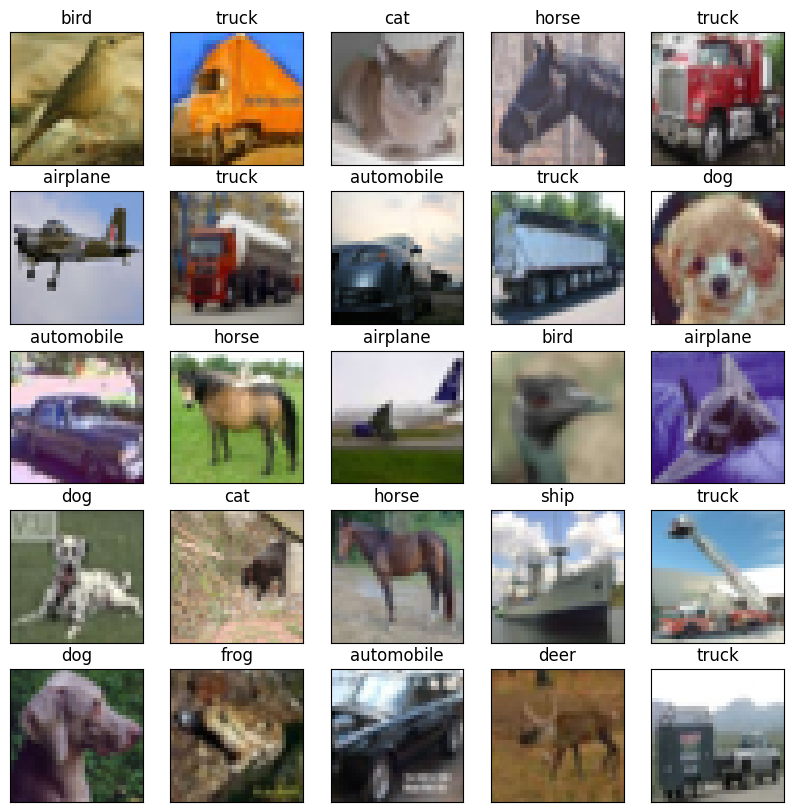

In [26]:
# Plot sample images from the training set
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.title(class_names[int(y_train[i][0])], fontsize=12)
plt.show()


Class distribution in training set: {0: 4497, 1: 4517, 2: 4513, 3: 4473, 4: 4527, 5: 4452, 6: 4509, 7: 4498, 8: 4518, 9: 4496}


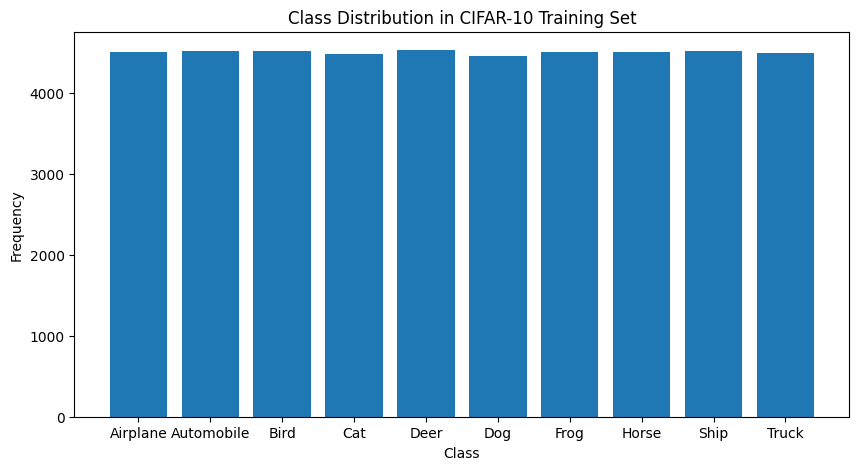

In [27]:
# Check the distribution of classes in the training set
classes, counts = np.unique(y_train, return_counts=True)
print('Class distribution in training set:', dict(zip(classes, counts)))

# Plot class distribution
plt.figure(figsize=(10, 5))
plt.bar(classes, counts)
plt.xticks(classes, ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in CIFAR-10 Training Set')
plt.show()

## EDA Interpretation:
The data set is clean with no missing values, and appropriate labels to photos, distribution is even. 
Outliers do not apply. The dataset after the data parsing contains 45,000 training images, 5,000 validation images, and 10,000 test images.

## Data Preprocessing


### Normalization
Normalizing the data is necessary here, because it scales the pixel values to the range [0, 1], which helps in faster convergence during training and training stabilization. This is important for our data because the pixel values in the CIFAR-10 dataset range from 0 to 255, and normalizing them ensures that the neural network can learn more efficiently by having the inputs on a consistent scale. Dividing by 255 scales the pixel values from their original range (0-255) to the range (0-1).


In [28]:
print('Before Normalization:')
print('Train Images - min:', np.min(X_train), 'max:', np.max(X_train))
print('Validation Images - min:', np.min(X_valid), 'max:', np.max(X_valid))
print('Test Images - min:', np.min(X_test), 'max:', np.max(X_test))


Before Normalization:
Train Images - min: 0 max: 255
Validation Images - min: 0 max: 255
Test Images - min: 0 max: 255


In [29]:
# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0


In [ ]:
# Verify normalization
print('Train Images - min:', np.min(X_train), 'max:', np.max(X_train))
print('Validation Images - min:', np.min(X_valid), 'max:', np.max(X_valid))
print('Test Images - min:', np.min(X_test), 'max:', np.max(X_test))


### One-Hot Encoding
Converting the labels to one-hot encoding format is necessary for multi-class classification problems.

In [31]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test = to_categorical(y_test, 10)


In [32]:
# Print shapes of the one-hot encoded labels to verify
print('Train Labels (One-Hot) Shape:', y_train.shape)
print('Validation Labels (One-Hot) Shape:', y_valid.shape)
print('Test Labels (One-Hot) Shape:', y_test.shape)


Train Labels (One-Hot) Shape: (45000, 10)
Validation Labels (One-Hot) Shape: (5000, 10)
Test Labels (One-Hot) Shape: (10000, 10)


### Data Augmentation
Data augmentation is used to artificially expand the dataset size by creating modified versions of images in the dataset.

In [33]:
# Data augmentation
data_generator = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.12,
    height_shift_range=0.12,
    horizontal_flip=True,
    zoom_range=0.1,
    brightness_range=[0.9,1.1],
    shear_range=10,
    channel_shift_range=0.1
)


## Model Building

In [34]:
# Build the CNN model
model = Sequential()
weight_decay = 0.0001

# 1st Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# 1st Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

# 3rd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# 2nd Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

# 5th Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# 6th Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# 3rd Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.4))

# Flatten
model.add(Flatten())

# Dense (Fully Connected) Layer
model.add(Dense(10, activation='softmax'))

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

## Model Training and Evaluation

### Compiling the Model
The model is compiled using the Adam optimizer, categorical crossentropy loss, and accuracy as a metric.


In [35]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


## Callbacks for Model Training

### ReduceLROnPlateau

The `ReduceLROnPlateau` callback is used to reduce the learning rate when the validation loss has stopped improving. This helps in fine-tuning the model by allowing it to learn more slowly once it has reached a plateau in the training process.

### EarlyStopping

The `EarlyStopping` callback is used to stop the training process when the validation loss has stopped improving for a specified number of epochs. This helps in preventing overfitting by stopping the training early once the model has converged.


In [ ]:
# Define Callback: Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   # Monitor validation loss
    factor=0.5,           # Reduce learning rate by a factor of 0.5
    patience=10,          # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=0.00001        # Lower bound on the learning rate
)




In [ ]:
# Define Callback: Stop training when a monitored metric has stopped improving
early_stopping = EarlyStopping(
    monitor='val_loss',          # Monitor validation loss
    patience=20,                 # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,   # Restore model weights from the epoch with the best validation loss
    verbose=1                    # Enable verbose output
)

In [ ]:
# Train the model
training_history = model.fit(data_generator.flow(X_train, y_train, batch_size=64),
                             epochs=30, 
                             validation_data=(X_valid, y_valid),
                             callbacks=[reduce_lr, early_stopping], 
                             verbose=1)

Epoch 1/30
704/704 [==============================] - 194s 275ms/step - loss: 0.6711 - accuracy: 0.8182 - val_loss: 3.1474 - val_accuracy: 0.1054 - lr: 1.2500e-04
Epoch 2/30
704/704 [==============================] - 195s 276ms/step - loss: 0.6438 - accuracy: 0.8243 - val_loss: 3.2383 - val_accuracy: 0.1054 - lr: 1.2500e-04
Epoch 3/30
704/704 [==============================] - 194s 275ms/step - loss: 0.6338 - accuracy: 0.8298 - val_loss: 3.1863 - val_accuracy: 0.1054 - lr: 1.2500e-04
Epoch 4/30
704/704 [==============================] - 193s 274ms/step - loss: 0.6241 - accuracy: 0.8318 - val_loss: 3.2340 - val_accuracy: 0.1054 - lr: 1.2500e-04
Epoch 5/30
704/704 [==============================] - 191s 271ms/step - loss: 0.6145 - accuracy: 0.8340 - val_loss: 3.2182 - val_accuracy: 0.1054 - lr: 1.2500e-04
Epoch 6/30
704/704 [==============================] - 193s 274ms/step - loss: 0.6098 - accuracy: 0.8352 - val_loss: 3.2594 - val_accuracy: 0.1054 - lr: 1.2500e-04
Epoch 7/30
704/704 [==

## Model Evaluation

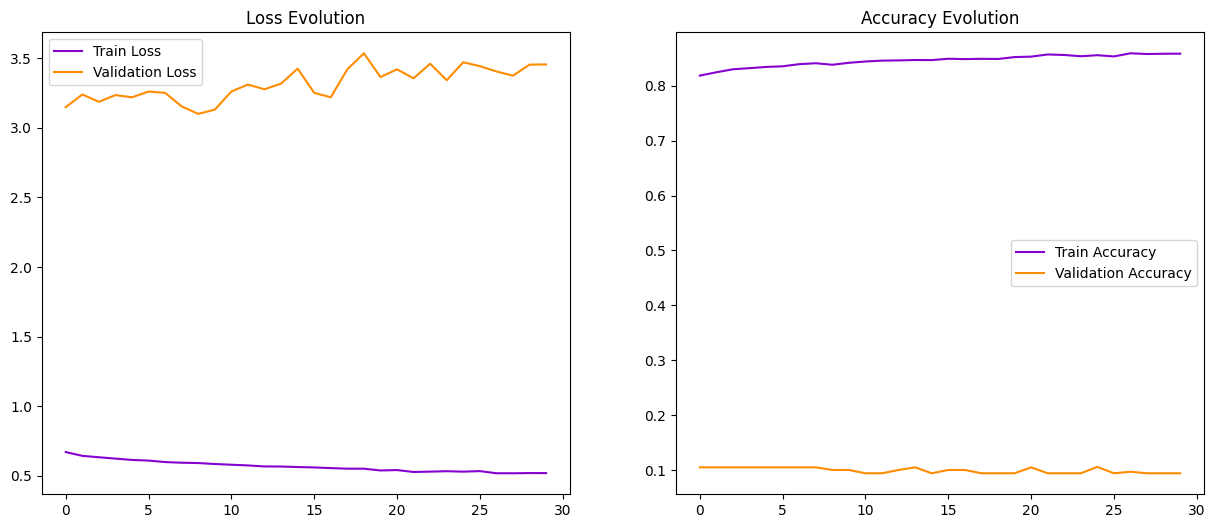

In [40]:
# Plot training history
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(training_history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(training_history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')
plt.show()

In [44]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('\nTest Accuracy:', test_acc)
print('Test Loss:', test_loss)



Test Accuracy: 0.10000000149011612
Test Loss: 3.4474356174468994


## Analysis of Findings

### Model Performance
The model achieved a test accuracy of 0.10 (10%) and a test loss of 3.45. Accuracy is a metric that indicates the proportion of correctly classified instances out of the total instances. Despite the model showing high training accuracy (85.82%) by the end of the epochs, the validation accuracy remained very low at 9.46%, indicating severe overfitting. This significant divergence between training and validation accuracy and loss means that the model fails to generalize well to unseen data, making it ineffective for practical applications. The accuracy and loss graphs are crucial for investigating how well the model learns from the training data and how it performs on the validation data. Ideally, both training and validation accuracy should improve, while training and validation loss should decrease, indicating a well-generalized model.

### Hyperparameter Tuning
The learning rate was adjusted dynamically using the ReduceLROnPlateau callback, which helped in fine-tuning the model's performance. Early stopping was employed to prevent overfitting. In addition to learning rate and early stopping, other critical hyperparameters considered were batch size, number of filters, kernel size, pooling type, dropout rate, and activation functions. Optimizer choice, such as using Adam, was selected strategically for efficient training. Tuning the batch size affected the stability and speed of the training process, while varying the number of filters and kernel size helped capture different levels of detail in the images. Adjusting the pooling type influenced how the model downsampled feature maps, which impacted its ability to capture important features. Adjusting the dropout rate and experimenting with activation functions influenced the model's non-linearity and regularization. The depth of the network and regularization parameters, such as L2 weight decay, were also tuned in an attempt to control overfitting and improve model performance. Despite these efforts, the model struggled to generalize well on the validation and test data.

### Challenges and Improvements
A significant challenge encountered was understanding why the model, which performed well on training accuracy, did not generalize effectively to the validation and test data. This discrepancy suggests overfitting, where the model learns the training data well but fails to apply that knowledge to new, unseen data. 
Another challenge was the long training times, even when utilizing GCP's powerful computational resources. This highlights the need for better optimization strategies and a need from me to become more efficent using cloud resources. Despite testing various architectures and hyperparameters, fine-tuning the model to achieve a balance between complexity and performance remains a critical area for improvement. Further experimentation with different model architectures, hyperparameters, and cloud platform configurations will be necessary to enhance both accuracy and training efficiency.

## Image Prediction Example
In this section, we fetch an image from the web, preprocess it, and use the trained CNN model to make a prediction. This demonstrates the model's ability to classify new, unseen images.

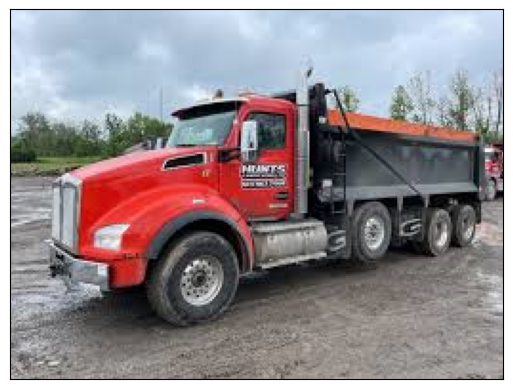

Predicted class: Deer


In [48]:
# Fetch and preprocess an image from the web
# URL of the image to be predicted
url = "https://raw.githubusercontent.com/FarzadNekouee/Keras-CIFAR10-CNN-Model/master/truck_sample.png"

# Fetch the image from the web
resp = urllib.request.urlopen(url)

# Read the image data into a numpy array
image = np.asarray(bytearray(resp.read()), dtype="uint8")

# Decode the image data into an image
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)

# Convert the image from BGR to RGB (OpenCV uses BGR by default)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Resize the image to the required input size of the model (32x32)
image = cv2.resize(image, (32, 32))

# Normalize the image
image = image.astype('float32') / 255.0

# Reshape the image to match the input shape of the model
image = image.reshape((1, 32, 32, 3))

# Make a prediction using the trained model
prediction = model.predict(image)

# Get the predicted class label
predicted_class = prediction.argmax()
print('Predicted class:', class_names[predicted_class])

The model predicted the class of the image as 'deer,' which is incorrect since the image is actually of a truck. This misclassification further highlights the model's poor generalization performance and need for improvements in training and tuning.

## Cloud Deployment

The model was trained and evaluated on Google Cloud Platform (GCP) using a virtual instance with GPU acceleration. My local machine was inefficient for training the CNN, but GCP provided the necessary computational power. The GCP environment allowed easy use of Jupyter notebooks, which I am accustomed to. GCP was chosen for its scalability, reliability, and powerful GPU support, significantly reducing training time. Its user-friendly interface made it an ideal fit for my model training and scalability needs with the CIFAR-10 data.

When considering the right cloud platform, the choice came down to an easy-to-use interface, compatibility with Jupyter notebooks, affordability, and efficient machine learning model preparation, training, and deployment. Both AWS and GCP meet these criteria. GCP’s Vertex AI offers an integrated platform for building and deploying machine learning models, simplifying the workflow with tools like AutoML and continuous model monitoring. Integration with other Google services, like BigQuery, enhances data handling. AWS SageMaker supports the entire machine learning workflow, from data preparation to model deployment, with advanced features like built-in algorithms and hyperparameter tuning. However, I found its interface very challenging when initally trying to save and deploy my model on AWS using SageMaker, making GCP more practical for my needs.

Utilizing GCP for this assignmetn did not come without challenges, I did encounter quota issues when deploying my model with GCP, which was difficult to understand when initally troubleshooting deployment issues, requiring me to request an quota increase. I will have to learn how to use AWS SageMaker and deployment to fully assess which is more suitable for tasks similar to mine and future projects.

## Conclusion

The model trained on the CIFAR-10 dataset showed promising potential, achieving a training accuracy of 85.82%. However, it performed poorly on the validation and test data, with a test accuracy of only 10%. This indicates severe overfitting and an inability to generalize well to unseen data, rendering it unsuitable for real-world applications at this stage.

Google Cloud Platform (GCP) proved to be a useful cloud computing option, providing sufficient computational power to handle my CNN on the CIFAR-10 dataset. Its simple interface allowed me to deploy my application efficiently for training and evaluation purposes.

Future work will focus on improving the model's generalization capabilities. This includes further hyperparameter tuning, experimenting with different model architectures, and exploring advanced techniques to address overfitting. I believe the issue with the model design is not significant. By enhancing the model's performance, we aim to develop a reliable image classification system suitable for real-world applications.


## References

Krizhevsky, A. (2009). *Learning multiple layers of features from tiny images* (Technical Report). University of Toronto. https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

Bachara, G. (2024, May 6). A 'hesitant' and 'confused' car? Driverless car turns into oncoming traffic in the East Valley. *12 News*. https://www.12news.com/article/traffic/wrong-way-waymo-arizona/75-3036bffe-4824-4056-bfeb-d1377fd0e4a6

Krizhevsky, A. (2009). Learning Multiple Layers of Features from Tiny Images. Retrieved from https://www.cs.toronto.edu/~kriz/cifar.html

Nekouee, F. (2023). Keras-CIFAR10-CNN-Model. GitHub repository. https://github.com/FarzadNekouee/Keras-CIFAR10-CNN-Model/blob/master/truck_sample.png

In [58]:
# For Model Deployment on GCP
#!pip install google-cloud-storage

# Save the model in the SavedModel format
model.save('saved_model')

import os
from google.cloud import storage

def upload_directory_to_bucket(bucket_name, source_directory, destination_directory):
    """Uploads a directory to the bucket."""
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    for root, _, files in os.walk(source_directory):
        for file in files:
            file_path = os.path.join(root, file)
            blob_path = os.path.join(destination_directory, os.path.relpath(file_path, source_directory))
            blob = bucket.blob(blob_path)
            blob.upload_from_filename(file_path)
            print(f"File {file_path} uploaded to {blob_path}.")

bucket_name = 'cnnbucket550'
source_directory = 'saved_model'  # Directory containing saved_model.pb
destination_directory = 'models/saved_model'

upload_directory_to_bucket(bucket_name, source_directory, destination_directory)



File saved_model/saved_model.pb uploaded to models/saved_model/saved_model.pb.
File saved_model/keras_metadata.pb uploaded to models/saved_model/keras_metadata.pb.
File saved_model/variables/variables.data-00000-of-00001 uploaded to models/saved_model/variables/variables.data-00000-of-00001.
File saved_model/variables/variables.index uploaded to models/saved_model/variables/variables.index.
